# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import shap
import seaborn as sns

import math


C:\Users\ismai\anaconda3\envs\project_clean\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading the dataset

In [2]:
data_csv = pd.read_csv(r"C:\Users\ismai\Downloads\archive (16)\equipment_anomaly_data.csv")

# Exploratory data analysis

Box plots of the sensors

C:\Users\ismai\AppData\Local\Temp\ipykernel_5764\2534690145.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ismai\AppData\Local\Temp\ipykernel_5764\2534690145.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ismai\AppData\Local\Temp\ipykernel_5764\2534690145.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ismai\AppData\Local\Temp\ipykernel_5764\2534690145.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

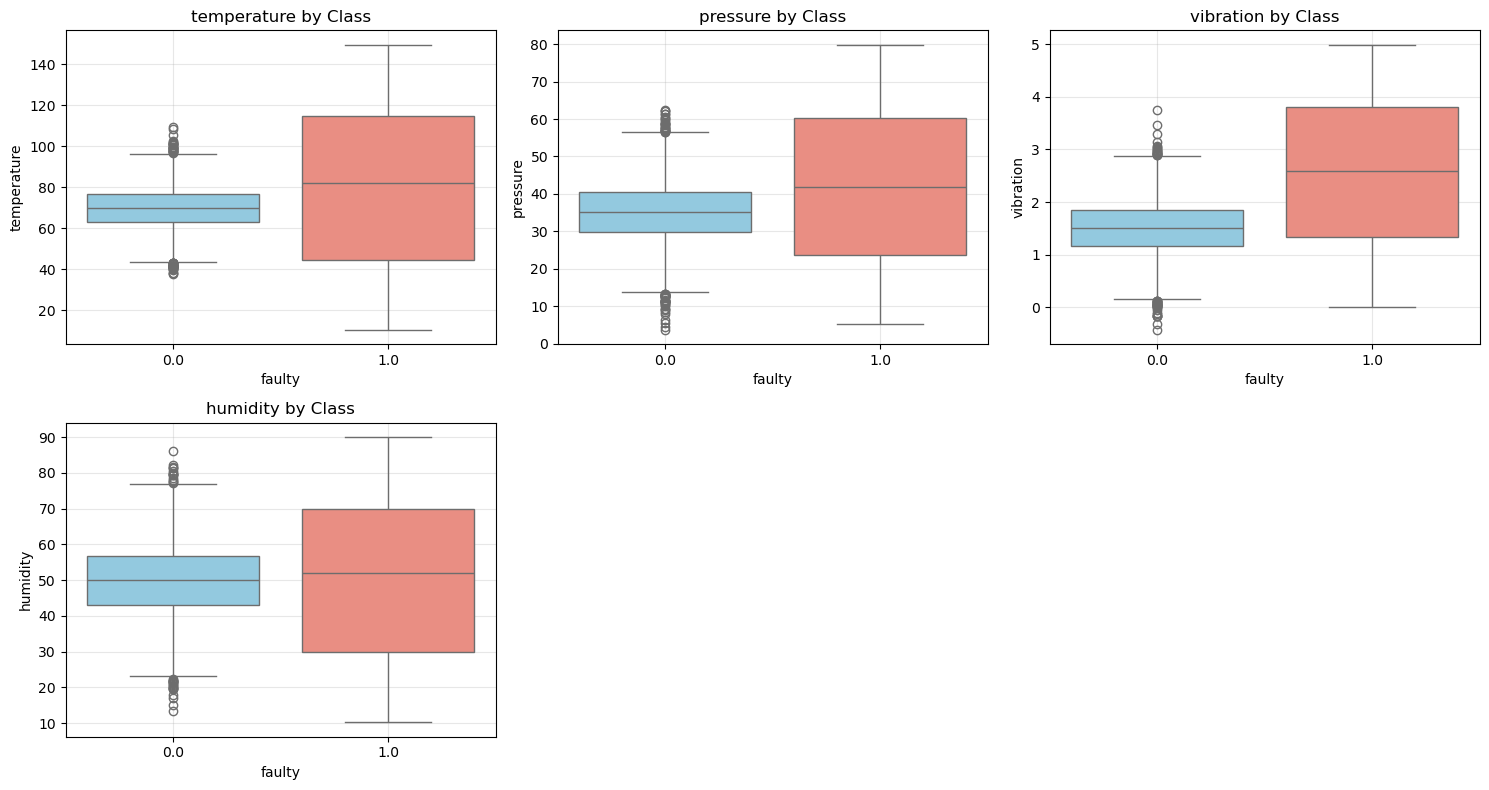

In [3]:

# Define categorical target column
target_col = 'faulty'

# Get numerical columns, but exclude the target column
num_cols = data_csv.select_dtypes(include='number').columns.drop(target_col)

# Define grid size
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # flatten in case we have multiple rows

# Plot each feature
for i, col in enumerate(num_cols):
    sns.boxplot(
        x=target_col,
        y=col,
        data=data_csv,
        palette=['skyblue', 'salmon'],
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Class")
    axes[i].grid(alpha=0.3)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Scatter plot temperature and pressure for Non faulty and faulty obserations

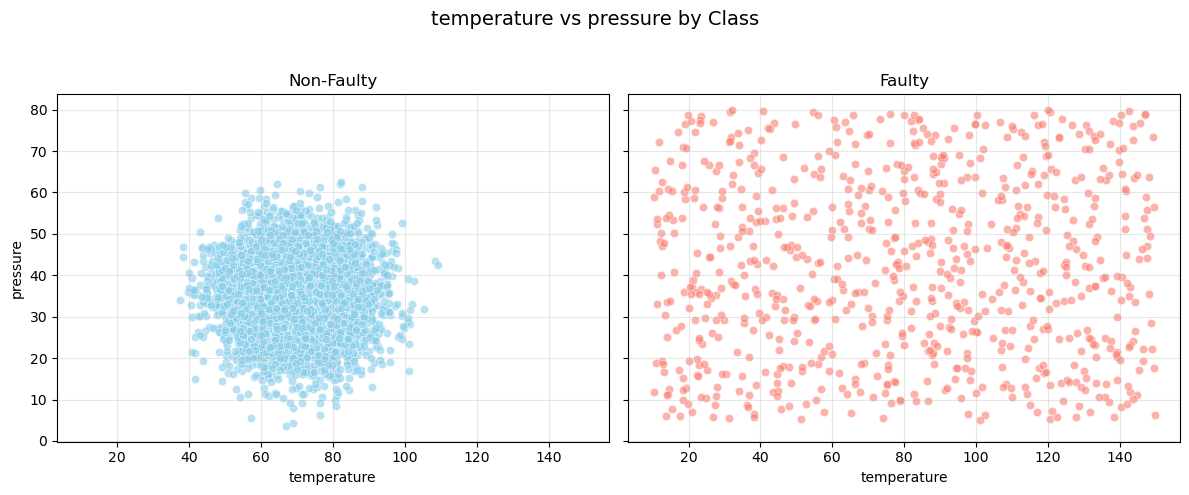

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features
feature_x = 'temperature'
feature_y = 'pressure'
target_col = 'faulty'

# Separate datasets
df_non_faulty = data_csv[data_csv[target_col] == 0.0]
df_faulty     = data_csv[data_csv[target_col] == 1.0]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)

# Non-Faulty Class
sns.scatterplot(
    x=feature_x,
    y=feature_y,
    data=df_non_faulty,
    color='skyblue',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Non-Faulty')
axes[0].set_xlabel(feature_x)
axes[0].set_ylabel(feature_y)
axes[0].grid(alpha=0.3)

# Faulty Class
sns.scatterplot(
    x=feature_x,
    y=feature_y,
    data=df_faulty,
    color='salmon',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title('Faulty')
axes[1].set_xlabel(feature_x)
axes[1].set_ylabel(feature_y)
axes[1].grid(alpha=0.3)

plt.suptitle(f"{feature_x} vs {feature_y} by Class", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Scatter plot vibration and pressure for Non faulty and faulty obserations

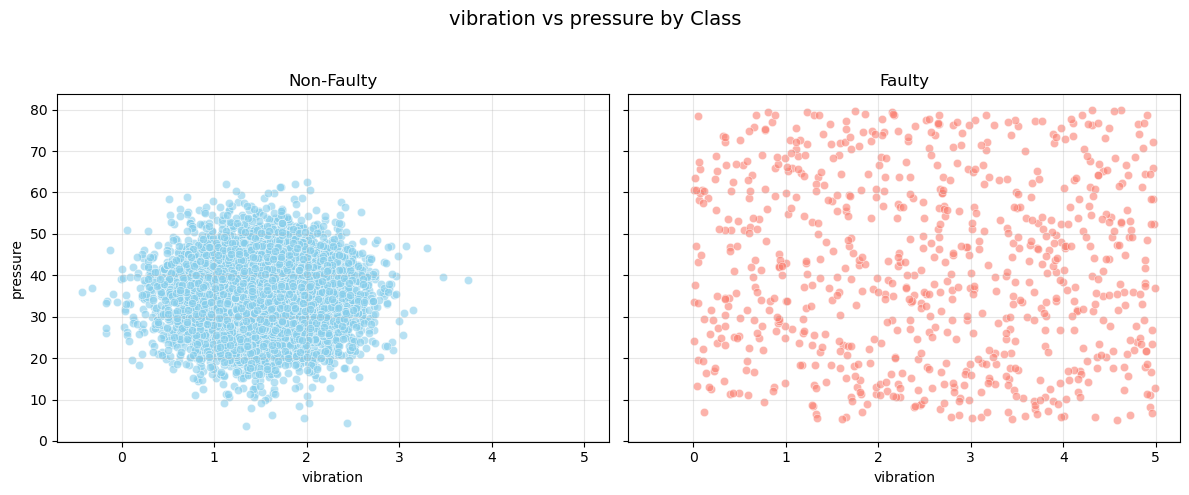

In [5]:


# Define features
feature_x = 'vibration'
feature_y = 'pressure'
target_col = 'faulty'

# Separate datasets
df_non_faulty = data_csv[data_csv[target_col] == 0.0]
df_faulty     = data_csv[data_csv[target_col] == 1.0]

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)

sns.scatterplot(
    x=feature_x,
    y=feature_y,
    data=df_non_faulty,
    color='skyblue',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Non-Faulty')
axes[0].set_xlabel(feature_x)
axes[0].set_ylabel(feature_y)
axes[0].grid(alpha=0.3)

# Faulty Class
sns.scatterplot(
    x=feature_x,
    y=feature_y,
    data=df_faulty,
    color='salmon',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title('Faulty')
axes[1].set_xlabel(feature_x)
axes[1].set_ylabel(feature_y)
axes[1].grid(alpha=0.3)

plt.suptitle(f"{feature_x} vs {feature_y} by Class", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Distribution plots of all sensors

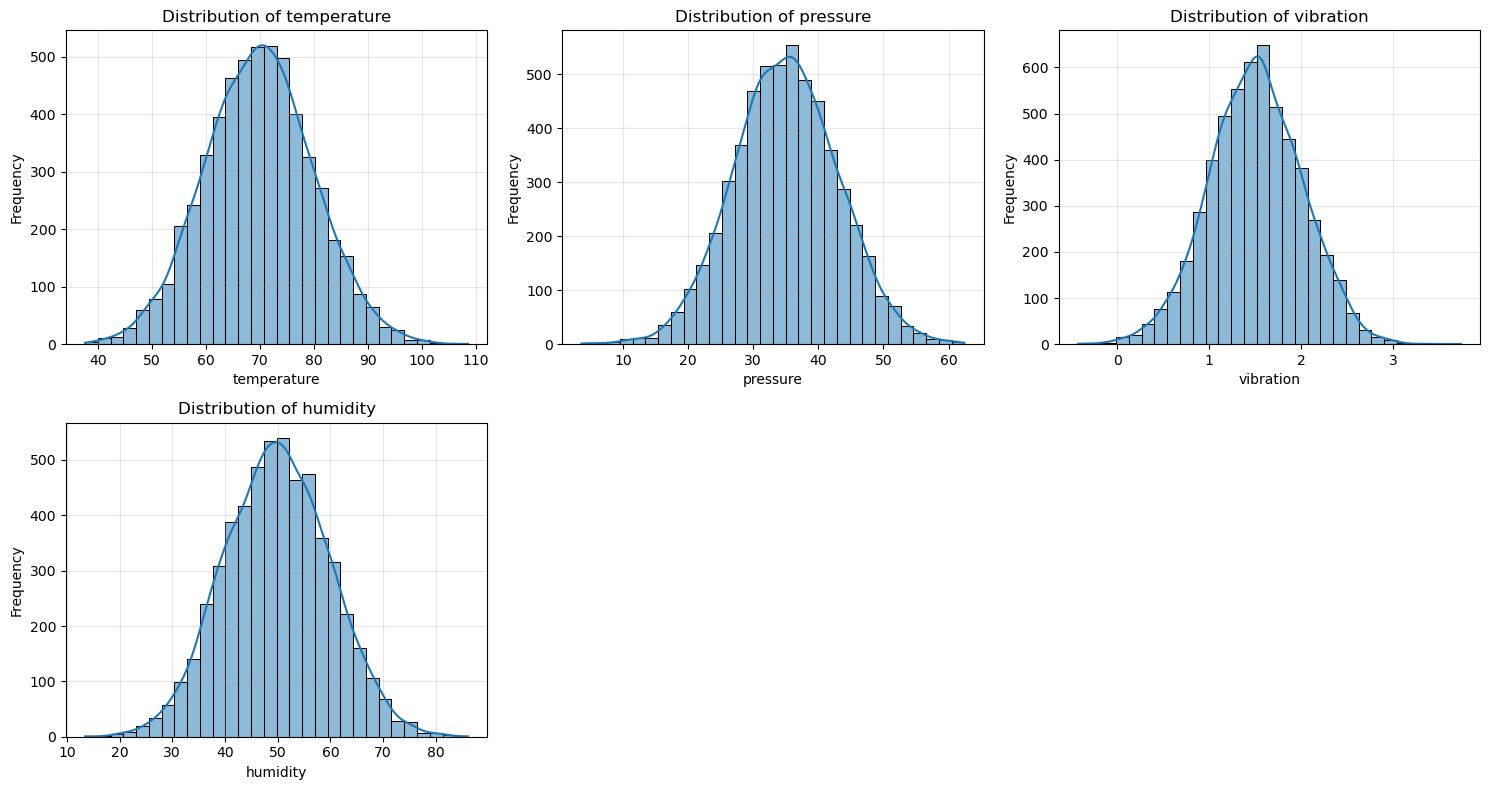

In [12]:

# Select numeric columns
num_cols = no_faulty_train.select_dtypes(include='number').columns

# Grid layout
n_cols = 3   # plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(
        no_faulty_train[col],
        kde=True,
        bins=30,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(alpha=0.3)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Creating training and testing sets for model implementation

In [7]:
x_faulty,y_faulty = train_test_split(data_csv[data_csv['faulty'] == 0.0],test_size = 0.2,shuffle = True)

In [8]:
faulty_data = data_csv[data_csv['faulty'] == 0.0]

no_faulty_train, no_faulty_test = train_test_split(faulty_data, test_size=0.2, shuffle=True, random_state=42)

In [9]:
no_faulty_train = no_faulty_train.drop(['faulty','location','equipment'],axis = 1)

In [10]:
faulty_data = data_csv[data_csv['faulty'] == 1.0]
test = pd.concat([no_faulty_test, faulty_data], ignore_index=True)
test = test.sample(frac=1, random_state=42).reset_index(drop=True)
X_test = test.drop(columns=['faulty']) 
y_test = test['faulty']               


In [11]:
X_test = X_test.drop(['location','equipment'],axis = 1)

# Scaling and modelling the data

One class SVM

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
ocsvm.fit(X_train_scaled)

OneClassSVM(gamma='auto', nu=0.05)

Predicting for test set and heatmap of classification results

              precision    recall  f1-score   support

      Normal       0.97      0.94      0.95      1381
      Faulty       0.90      0.95      0.92       767

    accuracy                           0.94      2148
   macro avg       0.93      0.94      0.94      2148
weighted avg       0.94      0.94      0.94      2148

[[1298   83]
 [  41  726]]


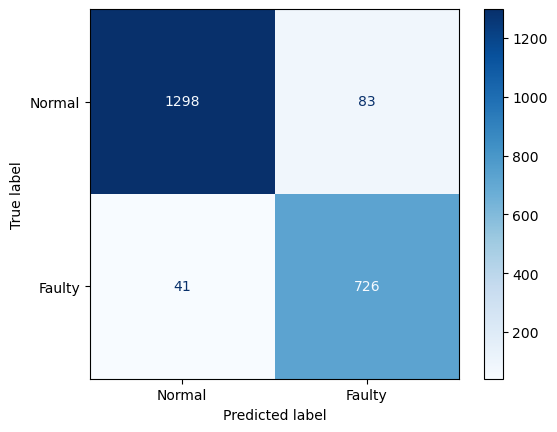

In [20]:
y_pred = ocsvm.predict(X_test_scaled)
y_pred = [0 if i == 1 else 1 for i in y_pred]
print(classification_report(y_test, y_pred, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)

# Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,
    random_state=42
)

iso_forest.fit(X_train_scaled)

# Predictions
y_pred_train = iso_forest.predict(X_train_scaled)
y_pred_test = iso_forest.predict(X_test_scaled)


              precision    recall  f1-score   support

      Normal       0.97      0.94      0.95      1381
      Faulty       0.90      0.94      0.92       767

    accuracy                           0.94      2148
   macro avg       0.93      0.94      0.94      2148
weighted avg       0.94      0.94      0.94      2148

[[1304   77]
 [  47  720]]


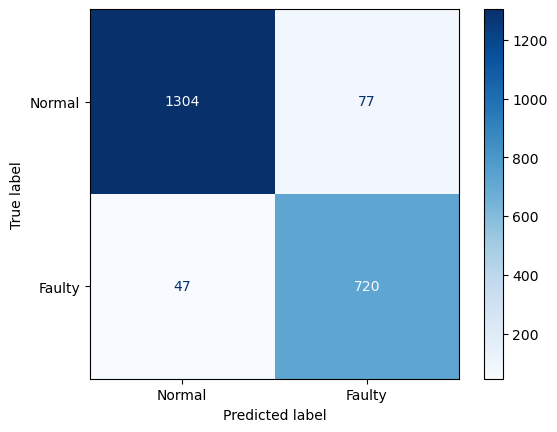

In [18]:
# Predict using Isolation Forest
y_pred = iso_forest.predict(X_test_scaled)

# Convert IF output (1=normal, -1=anomaly) → (0=normal, 1=faulty)
y_pred = [0 if i == 1 else 1 for i in y_pred]

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred, target_names=['Normal', 'Faulty']))

cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


<Axes: xlabel='humidity', ylabel='Density'>

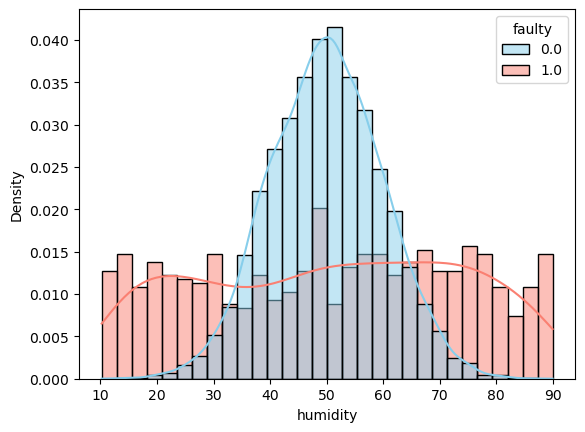

In [16]:
sns.histplot(
    data=data_csv,
    x=col,
    hue='faulty',
    kde=True,
    bins=30,
    stat='density',
    common_norm=False,   # IMPORTANT
    alpha=0.5,
    palette=['skyblue', 'salmon']
)


In [10]:
subset = X_test_scaled[:1000]  
explainer = shap.KernelExplainer(lambda x: ocsvm.decision_function(x), X_train_scaled)
shap_values = explainer.shap_values(subset)

Using 5524 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:10<00:00,  2.70it/s]


In [11]:
import shap
shap.initjs()

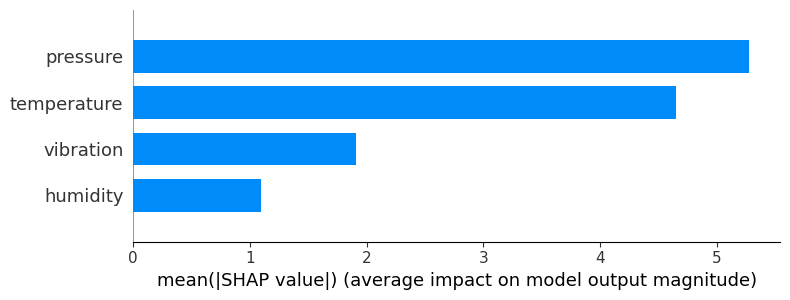

In [19]:
subset_df = pd.DataFrame(subset, columns=no_faulty_train.columns)
shap.summary_plot(shap_values, subset_df, plot_type="bar")

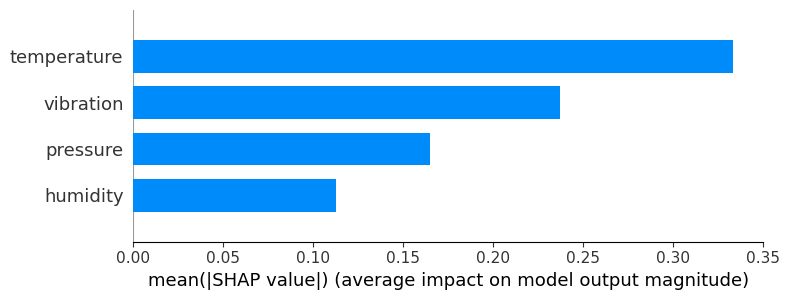

In [23]:
subset_df = pd.DataFrame(subset, columns=no_faulty_train.columns)
shap.summary_plot(shap_values, subset_df, plot_type="bar")

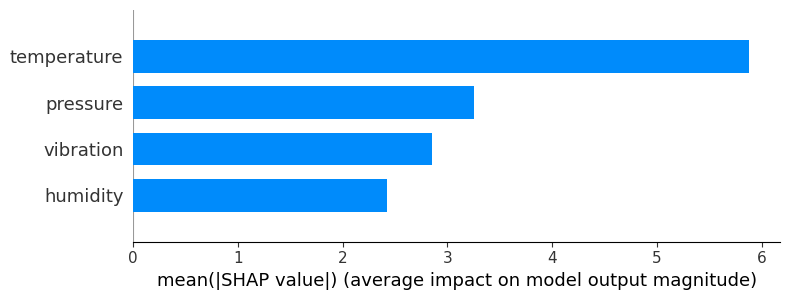

In [23]:
import pandas as pd
subset_df = pd.DataFrame(subset, columns=no_faulty_train.columns)
shap.summary_plot(shap_values, subset_df, plot_type="bar")

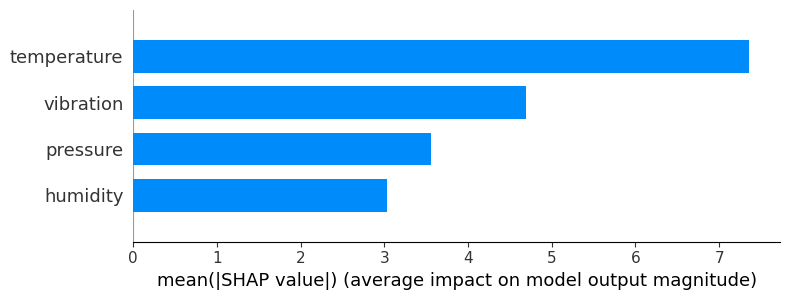

In [27]:
import pandas as pd

# If your subset is a NumPy array, wrap it in a DataFrame
subset_df = pd.DataFrame(subset, columns=no_faulty_train.columns)

shap.summary_plot(shap_values, subset_df, plot_type="bar")

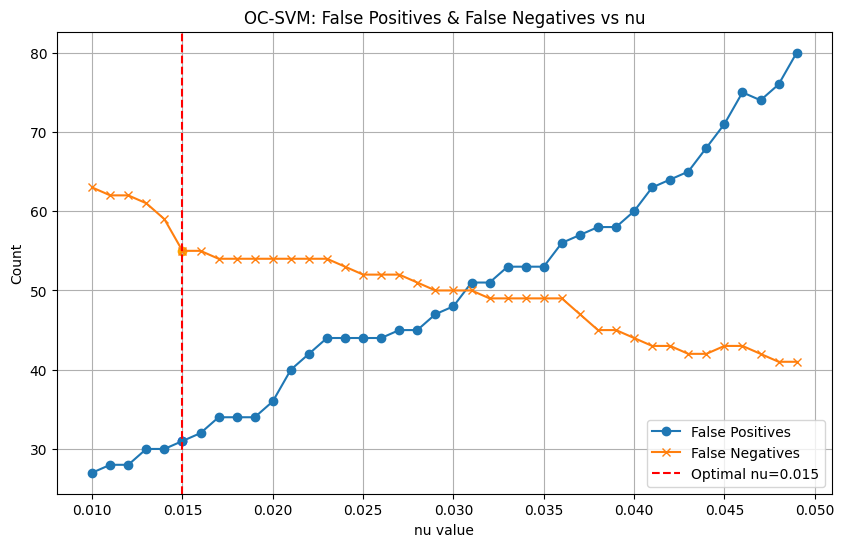

Optimal nu: 0.015
FP at optimal nu: 31, FN at optimal nu: 55
Total misclassifications: 86


In [12]:
nu_values = np.arange(0.01, 0.05, 0.001)
FP_list = []
FN_list = []

for nu in nu_values:
    ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=nu)
    ocsvm.fit(X_train_scaled)

    y_pred = ocsvm.predict(X_test_scaled)  
    y_pred_binary = np.where(y_pred == -1, 1, 0)  

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    
    FP_list.append(fp)
    FN_list.append(fn)


total_error = np.array(FP_list) + np.array(FN_list)
best_idx = np.argmin(total_error)
best_nu = nu_values[best_idx]
best_FP = FP_list[best_idx]
best_FN = FN_list[best_idx]

plt.figure(figsize=(10,6))
plt.plot(nu_values, FP_list, label='False Positives', marker='o')
plt.plot(nu_values, FN_list, label='False Negatives', marker='x')
plt.axvline(best_nu, color='r', linestyle='--', label=f'Optimal nu={best_nu:.3f}')
plt.scatter(best_nu, best_FP, color='blue')  
plt.scatter(best_nu, best_FN, color='orange')
plt.xlabel('nu value')
plt.ylabel('Count')
plt.title('OC-SVM: False Positives & False Negatives vs nu')
plt.legend()
plt.grid(True)
plt.show()
print(f"Optimal nu: {best_nu:.3f}")
print(f"FP at optimal nu: {best_FP}, FN at optimal nu: {best_FN}")
print(f"Total misclassifications: {best_FP + best_FN}")

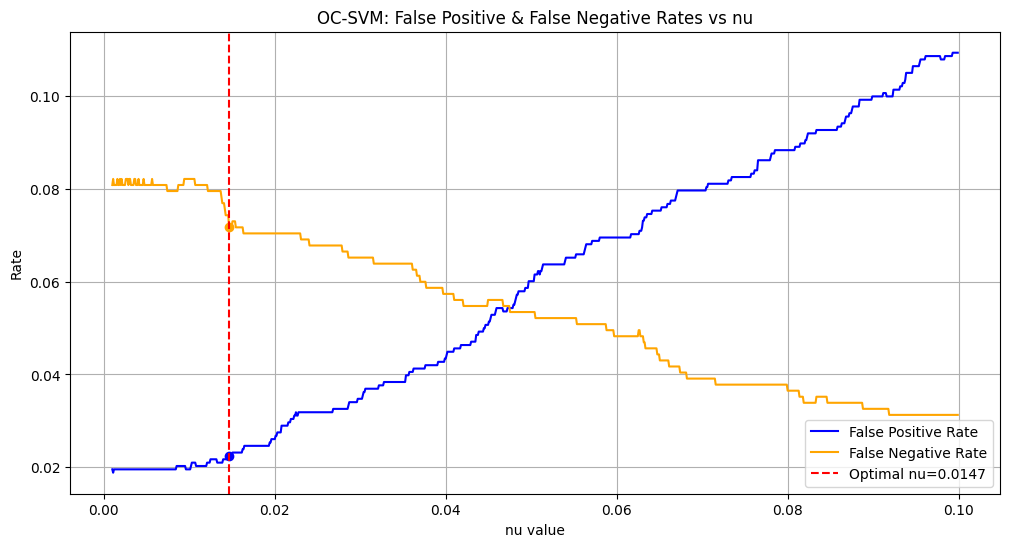

Optimal nu: 0.0147
False Positive Rate at optimal nu: 0.0224
False Negative Rate at optimal nu: 0.0717
Total misclassification rate: 0.0942


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix

# ----------------------------
# Assumptions:
# X_train_scaled: your training features (normal data only)
# X_test_scaled: your test features
# y_test: your test labels (0 = normal, 1 = faulty)
# ----------------------------

# Step 1: Generate ~1000 nu values
start = 0.001
stop = 0.1
num_points = 1000
step = (stop - start) / num_points
nu_values = np.arange(start, stop, step)

# Step 2: Lists to store FP and FN rates
FPR_list = []
FNR_list = []

# Count of normal and faulty samples
num_normal = sum(y_test == 0)
num_faulty = sum(y_test == 1)

# Step 3: Sweep nu
for nu in nu_values:
    # Train OC-SVM
    ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=nu)
    ocsvm.fit(X_train_scaled)
    
    # Predict
    y_pred = ocsvm.predict(X_test_scaled)  # 1 = normal, -1 = anomaly
    y_pred_binary = np.where(y_pred == -1, 1, 0)  # 1 = predicted anomaly
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    
    # FP / FN rates
    FPR = fp / num_normal
    FNR = fn / num_faulty
    
    FPR_list.append(FPR)
    FNR_list.append(FNR)

# Step 4: Find optimal nu (min total misclassification rate)
total_error_rate = np.array(FPR_list) + np.array(FNR_list)
best_idx = np.argmin(total_error_rate)
best_nu = nu_values[best_idx]
best_FPR = FPR_list[best_idx]
best_FNR = FNR_list[best_idx]

# Step 5: Plot FP and FN rates vs nu
plt.figure(figsize=(12,6))
plt.plot(nu_values, FPR_list, label='False Positive Rate', color='blue')
plt.plot(nu_values, FNR_list, label='False Negative Rate', color='orange')
plt.axvline(best_nu, color='red', linestyle='--', label=f'Optimal nu={best_nu:.4f}')
plt.scatter(best_nu, best_FPR, color='blue')
plt.scatter(best_nu, best_FNR, color='orange')
plt.xlabel('nu value')
plt.ylabel('Rate')
plt.title('OC-SVM: False Positive & False Negative Rates vs nu')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print summary
print(f"Optimal nu: {best_nu:.4f}")
print(f"False Positive Rate at optimal nu: {best_FPR:.4f}")
print(f"False Negative Rate at optimal nu: {best_FNR:.4f}")
print(f"Total misclassification rate: {total_error_rate[best_idx]:.4f}")


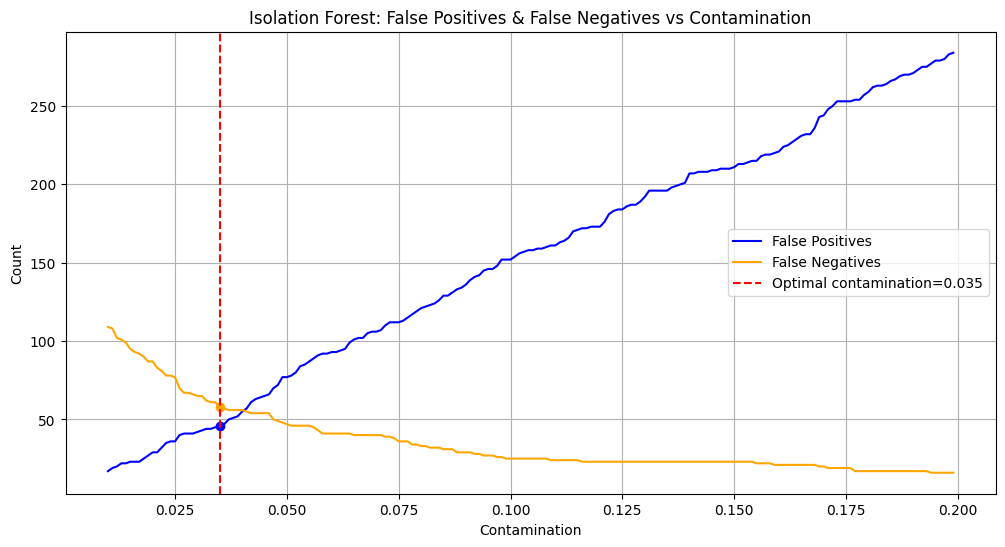

Optimal contamination: 0.035
FP at optimal contamination: 46, FN at optimal contamination: 58
Total misclassifications: 104


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
cont_values = np.arange(0.01, 0.2, 0.001) 
FP_list = []
FN_list = []
num_normal = sum(y_test == 0)
num_faulty = sum(y_test == 1)


for cont in cont_values:

    iso_forest = IsolationForest(n_estimators=100, contamination=cont, random_state=42)
    iso_forest.fit(X_train_scaled)
    

    y_pred = iso_forest.predict(X_test_scaled) 
    y_pred_binary = np.where(y_pred == -1, 1, 0) 
    

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    
    FP_list.append(fp)
    FN_list.append(fn)


total_error = np.array(FP_list) + np.array(FN_list)
best_idx = np.argmin(total_error)
best_cont = cont_values[best_idx]
best_FP = FP_list[best_idx]
best_FN = FN_list[best_idx]

plt.figure(figsize=(12,6))
plt.plot(cont_values, FP_list, label='False Positives', color='blue')
plt.plot(cont_values, FN_list, label='False Negatives', color='orange')
plt.axvline(best_cont, color='red', linestyle='--', label=f'Optimal contamination={best_cont:.3f}')
plt.scatter(best_cont, best_FP, color='blue')
plt.scatter(best_cont, best_FN, color='orange')
plt.xlabel('Contamination')
plt.ylabel('Count')
plt.title('Isolation Forest: False Positives & False Negatives vs Contamination')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Print summary
print(f"Optimal contamination: {best_cont:.3f}")
print(f"FP at optimal contamination: {best_FP}, FN at optimal contamination: {best_FN}")
print(f"Total misclassifications: {best_FP + best_FN}")


              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1381
      Faulty       0.96      0.92      0.94       767

    accuracy                           0.96      2148
   macro avg       0.96      0.95      0.95      2148
weighted avg       0.96      0.96      0.96      2148



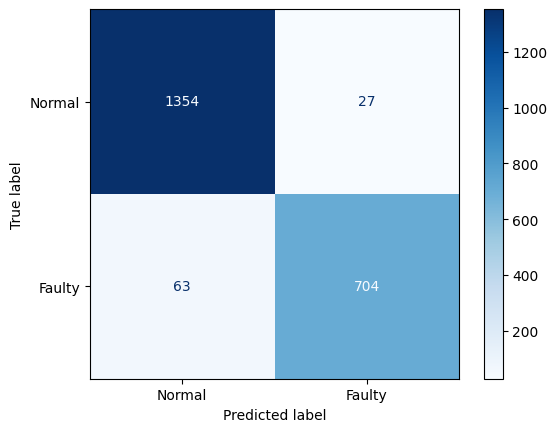

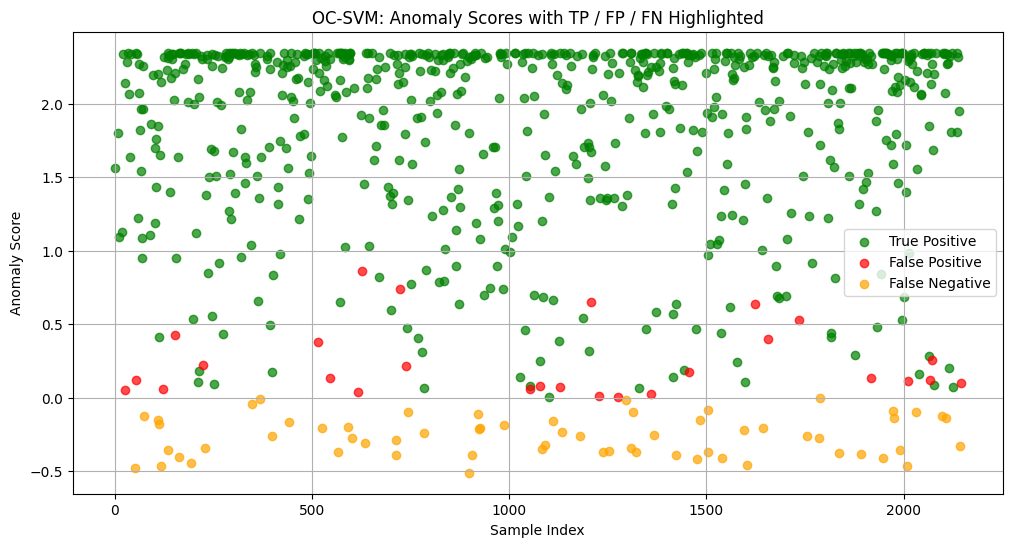

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Data prep (from your code)
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)  # only normal
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
# Map to 0 = normal, 1 = anomaly/faulty
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# Classification report & confusion matrix
print(classification_report(y_test, y_pred_binary, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# ----------------------------
# Compute anomaly scores
# ----------------------------
scores = ocsvm.decision_function(X_test_scaled)
anomaly_scores = -scores  
sample_idx = np.arange(len(y_test))

# True positives: predicted faulty AND actually faulty
tp_idx = np.where((y_pred_binary == 1) & (y_test == 1))[0]
# False positives: predicted faulty BUT actually normal
fp_idx = np.where((y_pred_binary == 1) & (y_test == 0))[0]
# False negatives: predicted normal BUT actually faulty
fn_idx = np.where((y_pred_binary == 0) & (y_test == 1))[0]

plt.figure(figsize=(12,6))
plt.scatter(tp_idx, anomaly_scores[tp_idx], color='green', label='True Positive', alpha=0.7)
plt.scatter(fp_idx, anomaly_scores[fp_idx], color='red', label='False Positive', alpha=0.7)
plt.scatter(fn_idx, anomaly_scores[fn_idx], color='orange', label='False Negative', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.title('OC-SVM: Anomaly Scores with TP / FP / FN Highlighted')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1381
      Faulty       0.96      0.92      0.94       767

    accuracy                           0.96      2148
   macro avg       0.96      0.95      0.95      2148
weighted avg       0.96      0.96      0.96      2148



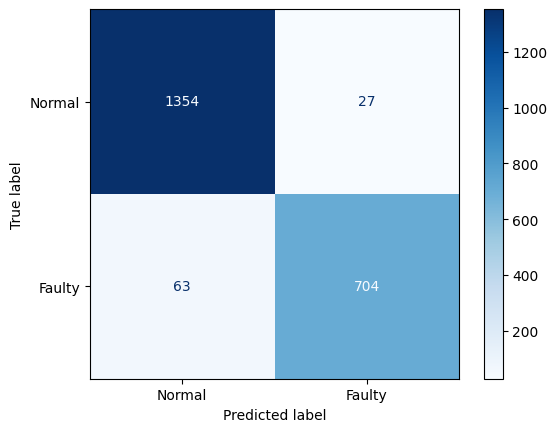

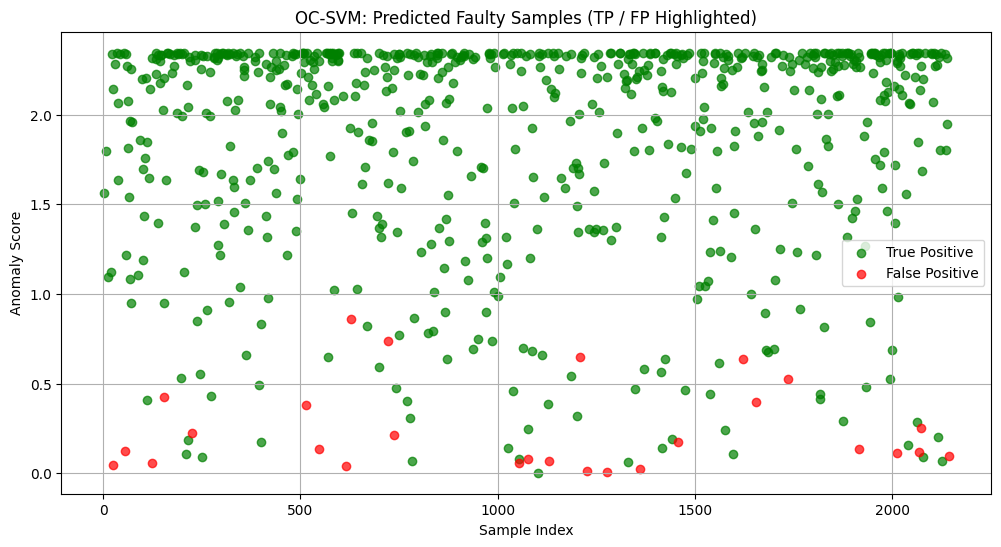

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Data prep (from your code)
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)  # only normal
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
# Map to 0 = normal, 1 = anomaly/faulty
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# Classification report & confusion matrix
print(classification_report(y_test, y_pred_binary, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# ----------------------------
# Compute anomaly scores
# ----------------------------
scores = ocsvm.decision_function(X_test_scaled)
anomaly_scores = -scores  # higher = more anomalous

# ----------------------------
# Only predicted faulty samples
# ----------------------------
pred_faulty_idx = np.where(y_pred_binary == 1)[0]

# Among predicted faulty: distinguish true positives vs false positives
tp_idx = [i for i in pred_faulty_idx if y_test[i] == 1]  # actually faulty
fp_idx = [i for i in pred_faulty_idx if y_test[i] == 0]  # actually normal

# Scatter plot
plt.figure(figsize=(12,6))
plt.scatter(tp_idx, anomaly_scores[tp_idx], color='green', label='True Positive', alpha=0.7)
plt.scatter(fp_idx, anomaly_scores[fp_idx], color='red', label='False Positive', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.title('OC-SVM: Predicted Faulty Samples (TP / FP Highlighted)')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1381
      Faulty       0.96      0.92      0.94       767

    accuracy                           0.96      2148
   macro avg       0.96      0.95      0.95      2148
weighted avg       0.96      0.96      0.96      2148



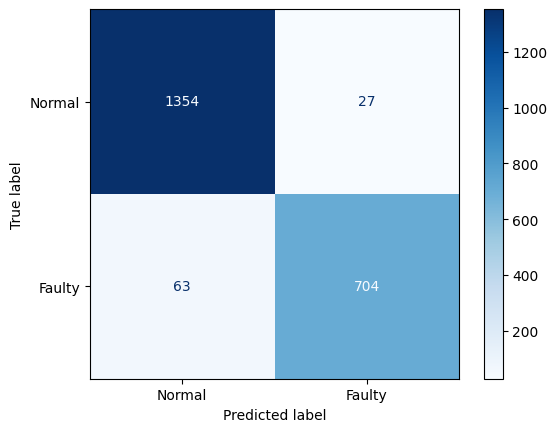

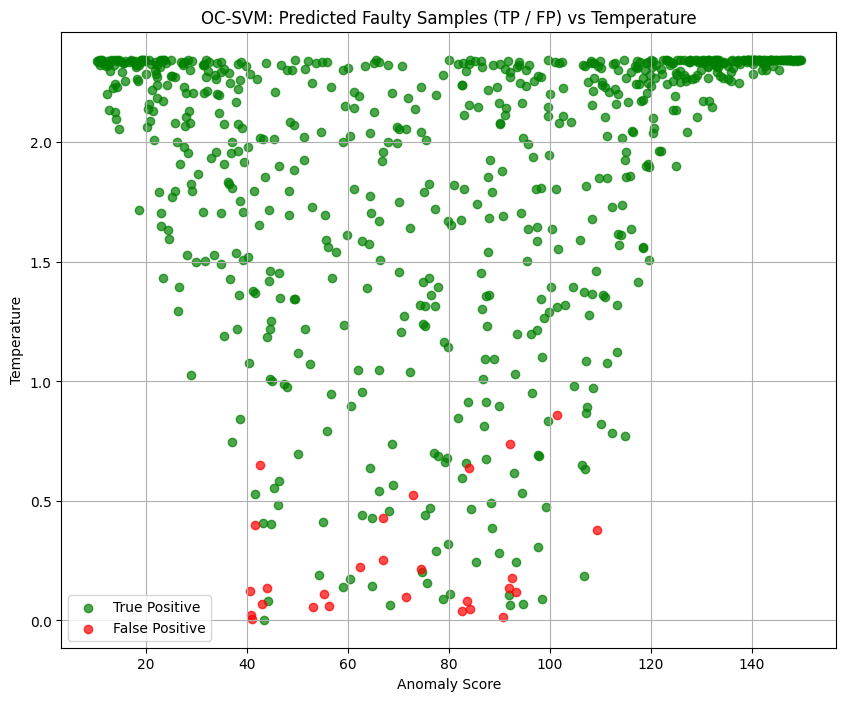

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Assume X_test is a DataFrame with feature 'temperature'
# ----------------------------
temperature = X_test['temperature'].values  # use original (unscaled) feature for y-axis

# Standard scale for model training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)  # only normal
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
# Map to 0 = normal, 1 = anomaly/faulty
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# Classification report & confusion matrix
print(classification_report(y_test, y_pred_binary, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# ----------------------------
# Compute anomaly scores
# ----------------------------
scores = ocsvm.decision_function(X_test_scaled)
anomaly_scores = -scores  # higher = more anomalous

# ----------------------------
# Only predicted faulty samples
# ----------------------------
pred_faulty_idx = np.where(y_pred_binary == 1)[0]

# Among predicted faulty: distinguish true positives vs false positives
tp_idx = [i for i in pred_faulty_idx if y_test[i] == 1]  # actually faulty
fp_idx = [i for i in pred_faulty_idx if y_test[i] == 0]  # actually normal

# Scatter plot: anomaly score vs temperature
plt.figure(figsize=(10,8))
plt.scatter(temperature[tp_idx],anomaly_scores[tp_idx] , color='green', label='True Positive', alpha=0.7)
plt.scatter(temperature[fp_idx], anomaly_scores[fp_idx], color='red', label='False Positive', alpha=0.7)

plt.xlabel('Anomaly Score')
plt.ylabel('Temperature')
plt.title('OC-SVM: Predicted Faulty Samples (TP / FP) vs Temperature')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1381
      Faulty       0.96      0.92      0.94       767

    accuracy                           0.96      2148
   macro avg       0.96      0.95      0.95      2148
weighted avg       0.96      0.96      0.96      2148



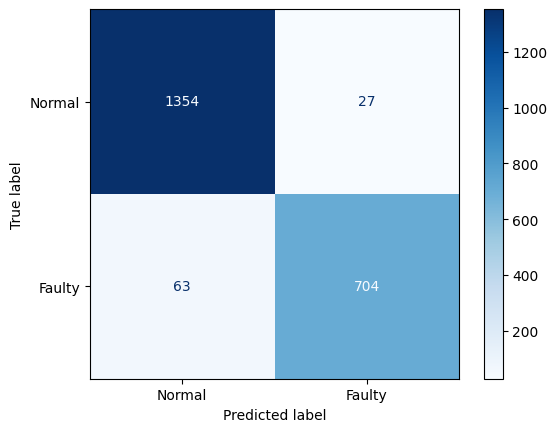

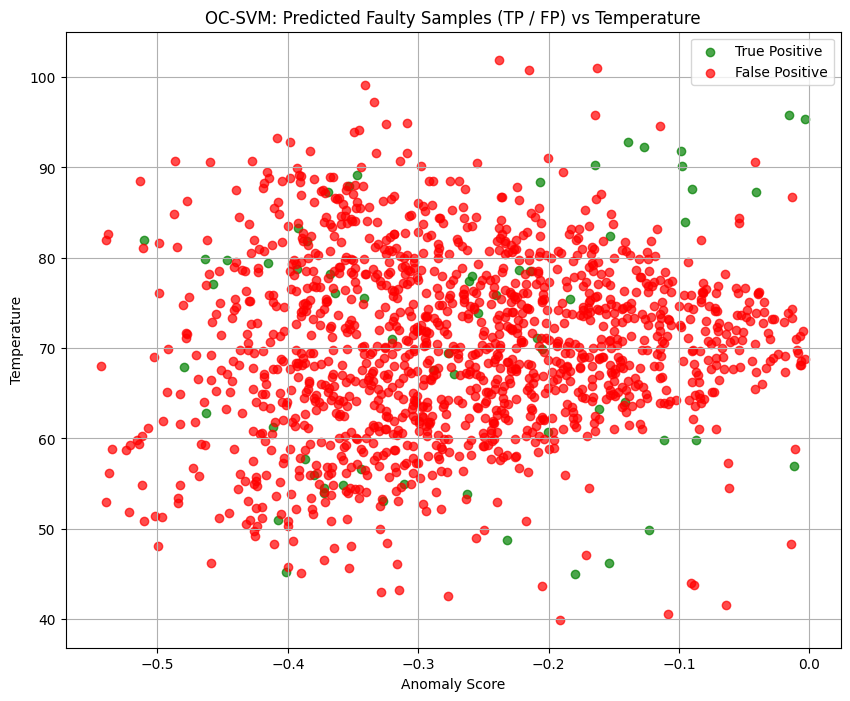

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Assume X_test is a DataFrame with feature 'temperature'
# ----------------------------
temperature = X_test['temperature'].values  # use original (unscaled) feature for y-axis

# Standard scale for model training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)  # only normal
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
# Map to 0 = normal, 1 = anomaly/faulty
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# Classification report & confusion matrix
print(classification_report(y_test, y_pred_binary, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# ----------------------------
# Compute anomaly scores
# ----------------------------
scores = ocsvm.decision_function(X_test_scaled)
anomaly_scores = -scores  # higher = more anomalous

# ----------------------------
# Only predicted faulty samples
# ----------------------------
pred_faulty_idx = np.where(y_pred_binary == 0)[0]

# Among predicted faulty: distinguish true positives vs false positives
tp_idx = [i for i in pred_faulty_idx if y_test[i] == 1]  # actually faulty
fp_idx = [i for i in pred_faulty_idx if y_test[i] == 0]  # actually normal

# Scatter plot: anomaly score vs temperature
plt.figure(figsize=(10,8))
plt.scatter(anomaly_scores[tp_idx], temperature[tp_idx], color='green', label='True Positive', alpha=0.7)
plt.scatter(anomaly_scores[fp_idx], temperature[fp_idx], color='red', label='False Positive', alpha=0.7)

plt.xlabel('Anomaly Score')
plt.ylabel('Temperature')
plt.title('OC-SVM: Predicted Faulty Samples (TP / FP) vs Temperature')
plt.legend()
plt.grid(True)
plt.show()


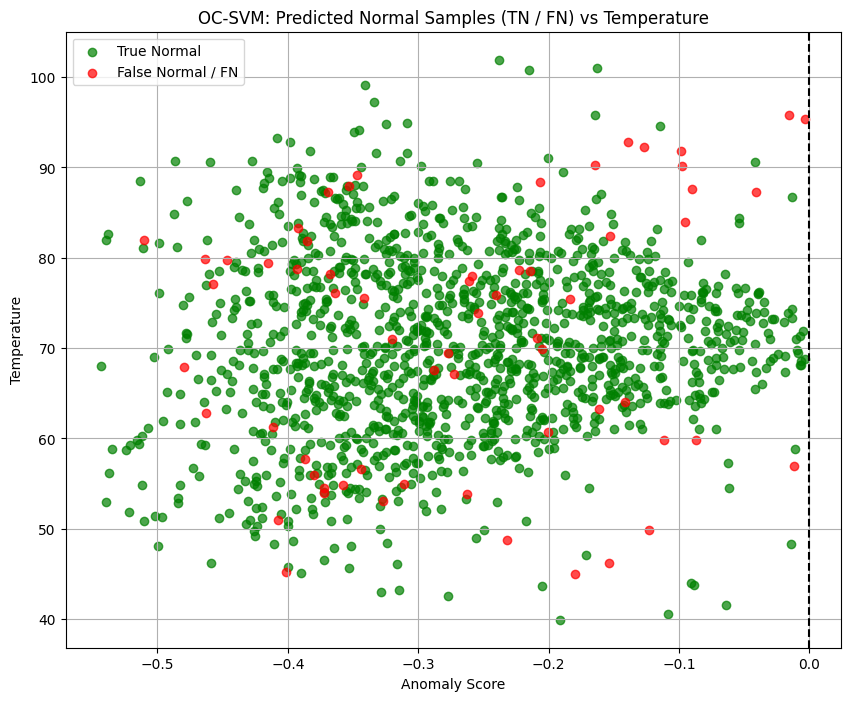

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Assume X_test is a DataFrame with feature 'temperature'
# ----------------------------
temperature = X_test['temperature'].values  # use original (unscaled) feature

# Standard scale for model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)  # only normal
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
# Map to 0 = normal, 1 = anomaly/faulty
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# ----------------------------
# Compute anomaly scores
# ----------------------------
scores = ocsvm.decision_function(X_test_scaled)
anomaly_scores = -scores  # higher = more anomalous

# ----------------------------
# Only predicted normal samples
# ----------------------------
pred_normal_idx = np.where(y_pred_binary == 0)[0]

# Among predicted normal: distinguish True Normal vs False Normal
tn_idx = [i for i in pred_normal_idx if y_test[i] == 0]  # actually normal
fn_idx = [i for i in pred_normal_idx if y_test[i] == 1]  # actually faulty

# Scatter plot: anomaly score vs temperature
plt.figure(figsize=(10,8))
plt.scatter(anomaly_scores[tn_idx], temperature[tn_idx], color='green', label='True Normal', alpha=0.7)
plt.scatter(anomaly_scores[fn_idx], temperature[fn_idx], color='red', label='False Normal / FN', alpha=0.7)

plt.xlabel('Anomaly Score')
plt.ylabel('Temperature')
plt.title('OC-SVM: Predicted Normal Samples (TN / FN) vs Temperature')
plt.legend()
plt.grid(True)

# Optional: decision threshold
plt.axvline(0, color='black', linestyle='--', label='Decision Threshold')
plt.show()


              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1381
      Faulty       0.96      0.92      0.94       767

    accuracy                           0.96      2148
   macro avg       0.96      0.95      0.95      2148
weighted avg       0.96      0.96      0.96      2148



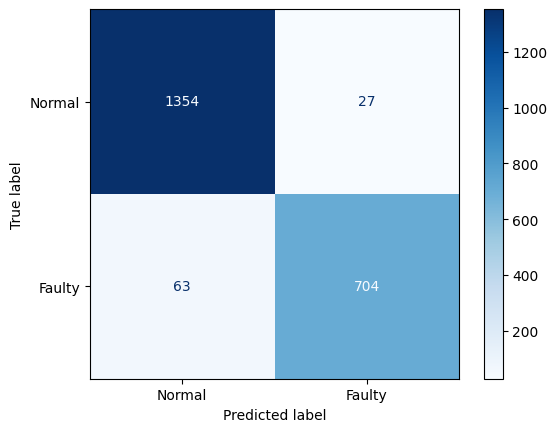

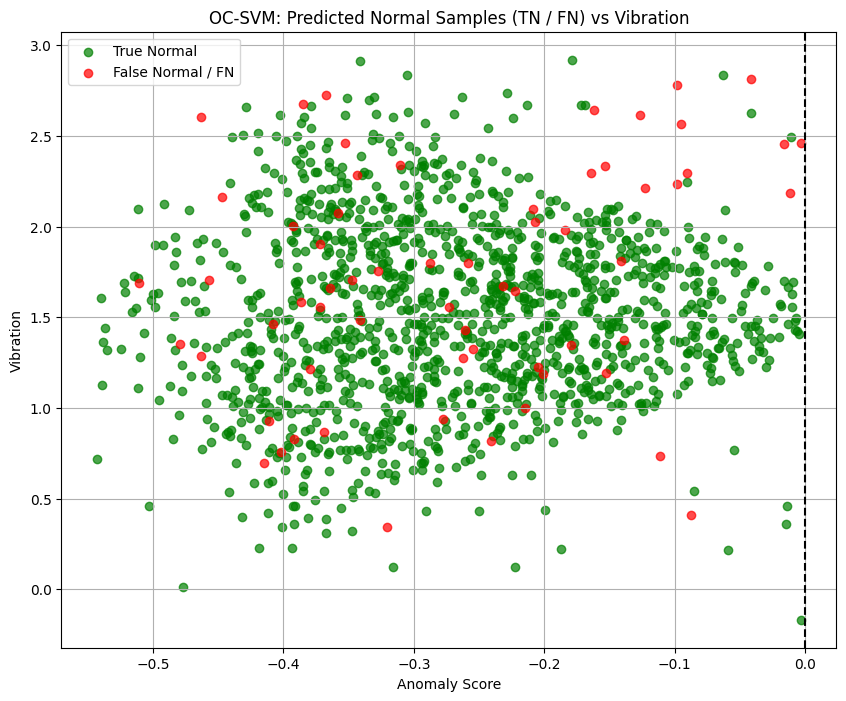

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Assume X_test is a DataFrame with feature 'vibration'
# ----------------------------
vibration = X_test['vibration'].values  # use original (unscaled) feature

# Standard scale for model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)  # only normal
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
# Map to 0 = normal, 1 = anomaly/faulty
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# Classification report & confusion matrix
print(classification_report(y_test, y_pred_binary, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# ----------------------------
# Compute anomaly scores
# ----------------------------
scores = ocsvm.decision_function(X_test_scaled)
anomaly_scores = -scores  # higher = more anomalous

# ----------------------------
# Only predicted normal samples
# ----------------------------
pred_normal_idx = np.where(y_pred_binary == 0)[0]

# Among predicted normal: distinguish True Normal vs False Normal
tn_idx = [i for i in pred_normal_idx if y_test[i] == 0]  # actually normal
fn_idx = [i for i in pred_normal_idx if y_test[i] == 1]  # actually faulty

# Scatter plot: anomaly score vs vibration
plt.figure(figsize=(10,8))
plt.scatter(anomaly_scores[tn_idx], vibration[tn_idx], color='green', label='True Normal', alpha=0.7)
plt.scatter(anomaly_scores[fn_idx], vibration[fn_idx], color='red', label='False Normal / FN', alpha=0.7)

plt.xlabel('Anomaly Score')
plt.ylabel('Vibration')
plt.title('OC-SVM: Predicted Normal Samples (TN / FN) vs Vibration')
plt.legend()
plt.grid(True)

# Optional: decision threshold
plt.axvline(0, color='black', linestyle='--', label='Decision Threshold')
plt.show()


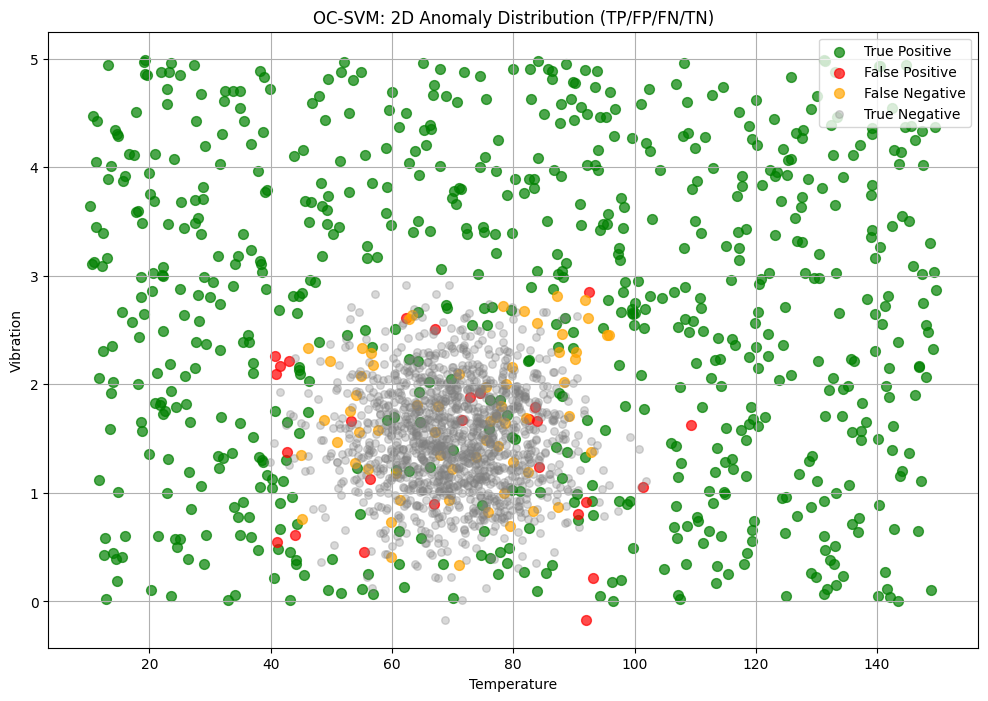

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Example features
# ----------------------------
x_var = X_test['temperature'].values   # X-axis
y_var = X_test['vibration'].values     # Y-axis

# Standard scaling for OC-SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# Compute anomaly scores (optional for size or transparency)
anomaly_scores = -ocsvm.decision_function(X_test_scaled)

# ----------------------------
# Identify TP, FP, FN, TN
# ----------------------------
tp_idx = np.where((y_pred_binary == 1) & (y_test == 1))[0]
fp_idx = np.where((y_pred_binary == 1) & (y_test == 0))[0]
fn_idx = np.where((y_pred_binary == 0) & (y_test == 1))[0]
tn_idx = np.where((y_pred_binary == 0) & (y_test == 0))[0]

# ----------------------------
# 2D Scatter Plot
# ----------------------------
plt.figure(figsize=(12,8))

plt.scatter(x_var[tp_idx], y_var[tp_idx], color='green', label='True Positive', alpha=0.7, s=50)
plt.scatter(x_var[fp_idx], y_var[fp_idx], color='red', label='False Positive', alpha=0.7, s=50)
plt.scatter(x_var[fn_idx], y_var[fn_idx], color='orange', label='False Negative', alpha=0.7, s=50)
plt.scatter(x_var[tn_idx], y_var[tn_idx], color='gray', label='True Negative', alpha=0.3, s=30)  # optional

plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.title('OC-SVM: 2D Anomaly Distribution (TP/FP/FN/TN)')
plt.legend()
plt.grid(True)
plt.show()


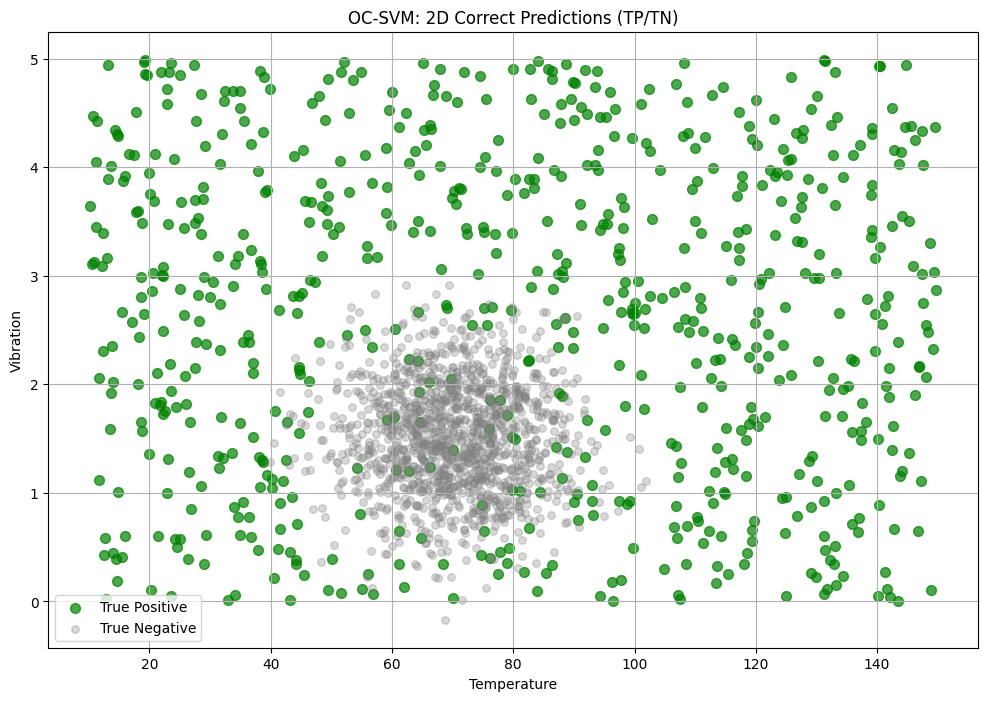

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Example features
# ----------------------------
x_var = X_test['temperature'].values   # X-axis
y_var = X_test['vibration'].values     # Y-axis

# Standard scaling for OC-SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# ----------------------------
# Identify TP and TN only
# ----------------------------
tp_idx = np.where((y_pred_binary == 1) & (y_test == 1))[0]
tn_idx = np.where((y_pred_binary == 0) & (y_test == 0))[0]

# ----------------------------
# 2D Scatter Plot (TP/TN only)
# ----------------------------
plt.figure(figsize=(12,8))

plt.scatter(x_var[tp_idx], y_var[tp_idx], color='green', label='True Positive', alpha=0.7, s=50)
plt.scatter(x_var[tn_idx], y_var[tn_idx], color='gray', label='True Negative', alpha=0.3, s=30)

plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.title('OC-SVM: 2D Correct Predictions (TP/TN)')
plt.legend()
plt.grid(True)
plt.show()


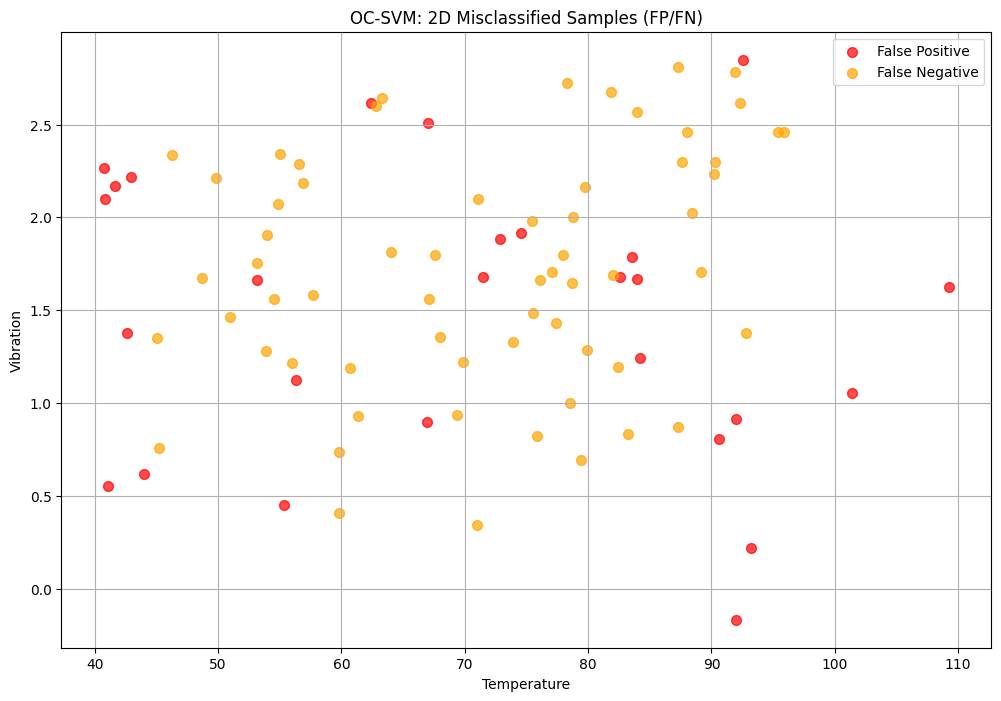

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

# ----------------------------
# Features for plotting
# ----------------------------
x_var = X_test['temperature'].values  # X-axis
y_var = X_test['vibration'].values    # Y-axis

# Standard scaling for model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# ----------------------------
# Identify misclassified points
# ----------------------------
fp_idx = np.where((y_pred_binary == 1) & (y_test == 0))[0]  # predicted faulty but actually normal
fn_idx = np.where((y_pred_binary == 0) & (y_test == 1))[0]  # predicted normal but actually faulty

# ----------------------------
# 2D Scatter Plot for misclassified points
# ----------------------------
plt.figure(figsize=(12,8))

plt.scatter(x_var[fp_idx], y_var[fp_idx], color='red', label='False Positive', alpha=0.7, s=50)
plt.scatter(x_var[fn_idx], y_var[fn_idx], color='orange', label='False Negative', alpha=0.7, s=50)

plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.title('OC-SVM: 2D Misclassified Samples (FP/FN)')
plt.legend()
plt.grid(True)
plt.show()


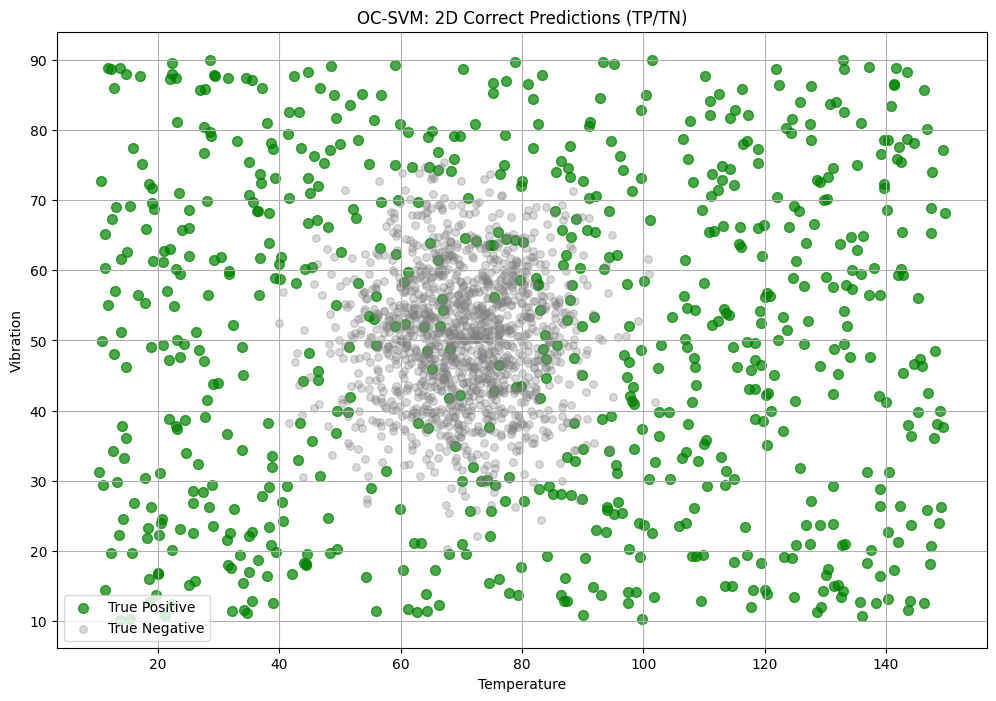

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Example features
# ----------------------------
x_var = X_test['temperature'].values   # X-axis
y_var = X_test['humidity'].values     # Y-axis

# Standard scaling for OC-SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# ----------------------------
# Identify TP and TN only
# ----------------------------
tp_idx = np.where((y_pred_binary == 1) & (y_test == 1))[0]
tn_idx = np.where((y_pred_binary == 0) & (y_test == 0))[0]

# ----------------------------
# 2D Scatter Plot (TP/TN only)
# ----------------------------
plt.figure(figsize=(12,8))

plt.scatter(x_var[tp_idx], y_var[tp_idx], color='green', label='True Positive', alpha=0.7, s=50)
plt.scatter(x_var[tn_idx], y_var[tn_idx], color='gray', label='True Negative', alpha=0.3, s=30)

plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.title('OC-SVM: 2D Correct Predictions (TP/TN)')
plt.legend()
plt.grid(True)
plt.show()

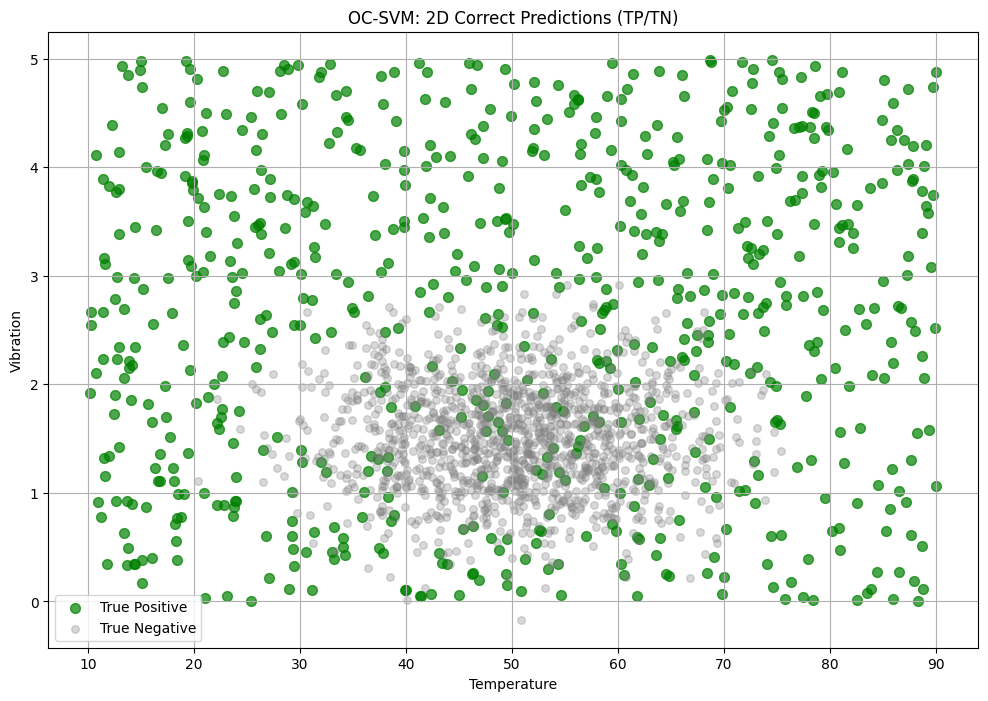

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Example features
# ----------------------------
x_var = X_test['humidity'].values   # X-axis
y_var = X_test['vibration'].values     # Y-axis

# Standard scaling for OC-SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)

# Train OC-SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

# Predictions
y_pred = ocsvm.predict(X_test_scaled)
y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

# ----------------------------
# Identify TP and TN only
# ----------------------------
tp_idx = np.where((y_pred_binary == 1) & (y_test == 1))[0]
tn_idx = np.where((y_pred_binary == 0) & (y_test == 0))[0]

# ----------------------------
# 2D Scatter Plot (TP/TN only)
# ----------------------------
plt.figure(figsize=(12,8))

plt.scatter(x_var[tp_idx], y_var[tp_idx], color='green', label='True Positive', alpha=0.7, s=50)
plt.scatter(x_var[tn_idx], y_var[tn_idx], color='gray', label='True Negative', alpha=0.3, s=30)

plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.title('OC-SVM: 2D Correct Predictions (TP/TN)')
plt.legend()
plt.grid(True)
plt.show()